In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold

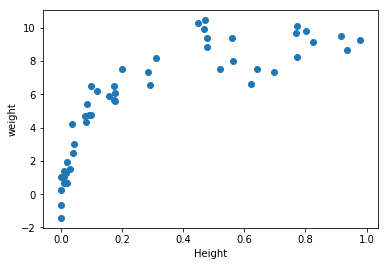

In [2]:
# Let's create our own dataset


def make_data(N, err = 1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./(X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N) 
        
    return X, y

X, y = make_data(50)

# print(x.shape)
plt.scatter(X, y)
plt.xlabel('Height')
plt.ylabel('weight')
plt.show() # We got our data

In [3]:
X = X.reshape(50, 1)

In [11]:
kf = KFold(n_splits=5) # Define the split - into 2 folds 
m = kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=5, random_state=None, shuffle=False)


In [5]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] TEST: [0 1 2 3 4 5 6 7 8 9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] TEST: [10 11 12 13 14 15 16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49] TEST: [20 21 22 23 24 25 26 27 28 29]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 40 41 42 43 44 45 46 47 48 49] TEST: [30 31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48 49]


This is how splitting is done inside the KFold. Remember, the purpose of cross-validation is not to come up with a predictive model, but to evaluate how accurately a predictive model will perform in practice. Second of all, for the sake of argument, let's say you were to use k-fold cross-validation with k=10 to find out which one of three different classification algorithms would be the most suitable in solving a given classification problem. In that case, the data is randomly split into k parts of equal size. One of the parts is reserved for testing and the rest k-1 parts will be used for training. The cross-validation process is repeated k (fold) times so that on every iteration different part is used for testing. After running the cross-validation you look at the results from each fold and wonder which classification algorithm (not any of the trained models!) is the most suitable. You don't want to choose the algorithm that has the highest test accuracy on one of the 10 iterations, because maybe it just happened randomly that the test data on that particular iteration contained very easy examples, which then lead to high test accuracy. What you want to do, is to choose the algorithm which produced the best accuracy averaged over all k folds. Now that you have chosen the algorithm, you can train it using your whole training data and start making predictions in the wild.

In [6]:
# We will create two models for our data
# One model is Simple Linear Regression and other is Polynomial Regression with degree 2

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Let's create our own Polynomial model
def PolynomialRegression(degree = 2, **kwargs):
     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
    
    
model_2 = PolynomialRegression(2)

In [7]:
# Now we need a method to see how this two models are performing on the data

from sklearn.model_selection import cross_val_score

score1 = cross_val_score(model_1, X, y, cv = 5, scoring =  'explained_variance')
print(score1)
print('The mean of all 5 for scores for score1 is {}.'.format(score1.mean()))

score2 = cross_val_score(model_2, X, y, cv = 5, scoring =  'explained_variance')
print(score2)
print('The mean of all 5 for scores for score2 is {}.'.format(score2.mean()))


[0.51217354 0.64374363 0.86787643 0.55521982 0.58934379]
The mean of all 5 for scores for score1 is 0.6336714405103254.
[0.71826081 0.92058772 0.93139789 0.77988127 0.73410737]
The mean of all 5 for scores for score2 is 0.8168470115046201.


(500, 1)


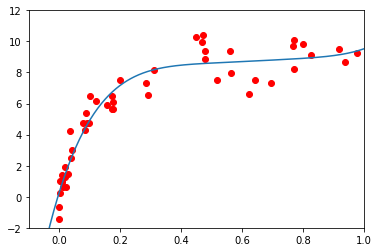

In [8]:
model_2.fit(X, y)

# Let's see the result of each data
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
print(X_test.shape)
plt.scatter(X.ravel(), y, color = 'r')

axis = plt.axis()
y_test = PolynomialRegression(5).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.show()

<font size = 4>Leave One Out Cross Validation (LOOCV)

In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like kfold.

In [9]:
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
df = load_iris()
X = df.data
y = df.target
score = cross_val_score(model, X, y, cv = LeaveOneOut())
print(score)
print('The mean of the all score is {}'.format(score.mean()))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
The mean of the all score is 0.9666666666666667
